# Lab | Cleaning categorical data

### Import the necessary libraries if you are starting a new notebook.

In [1]:
import pandas as pd
import numpy as np
import datetime
import warnings

warnings.filterwarnings('ignore')
warnings.filterwarnings("ignore", message="numpy.ufunc size changed")

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

%matplotlib inline

pd.set_option('display.max_columns', None)

from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

### Load the continuous and discrete variables into continuous_df and discrete_df variables.

In [4]:
customer_df = pd.read_csv('we_fn_use_c_marketing_customer_value_analysis.csv') 

In [5]:
numericals = customer_df.select_dtypes(np.number)
def to_dict(df):
    for col in df.columns:
        if df[col].dtypes == 'int64':
            df1 = df.select_dtypes(include='int64')
            discrete = df1.to_dict()
        else:
            df2 = df.select_dtypes(include='float64')
            continuous = df2.to_dict()
    return continuous, discrete

continuous, discrete = to_dict(numericals)
discrete_df = pd.DataFrame.from_dict(discrete)
discrete_df.head()

,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies
0,56274,69,32,5,0,1
1,0,94,13,42,0,8
2,48767,108,18,38,0,2
3,0,106,18,65,0,7
4,43836,73,12,44,0,1


In [6]:
continuous_df= pd.DataFrame.from_dict(continuous)
continuous_df.head()

,Customer Lifetime Value,Total Claim Amount
0,2763.519279,384.811147
1,6979.535903,1131.464935
2,12887.431650,566.472247
3,7645.861827,529.881344
4,2813.692575,138.130879


### Plot a correlation matrix, what can you see?

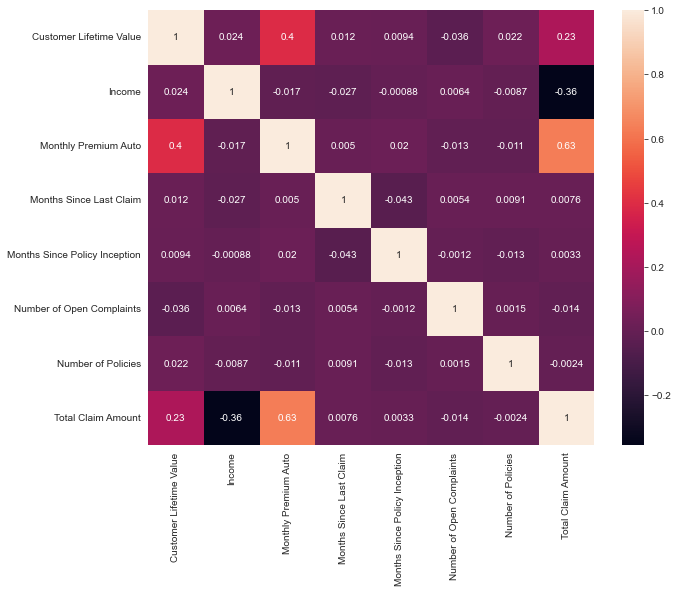

In [7]:
num = customer_df.select_dtypes(include = np.number)
corr_matrix=num.corr(method='pearson')  
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(corr_matrix, annot=True)
plt.show()

### Create a function to plot every discrete variables. Do the same with continuous variables (be careful, you may change the plot type to another one better suited for continuous data).

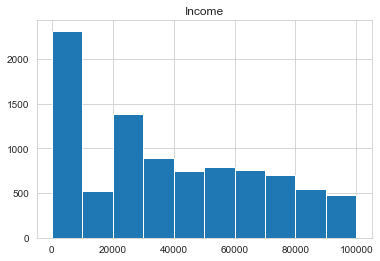

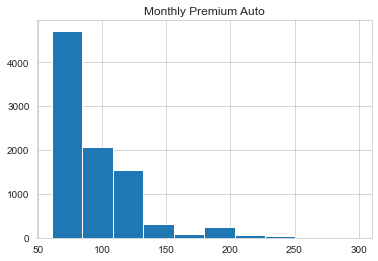

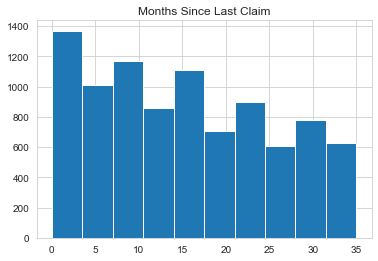

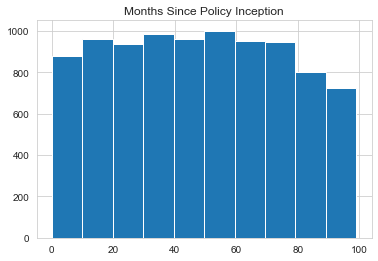

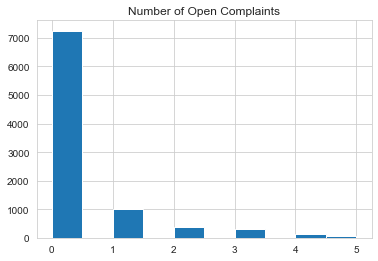

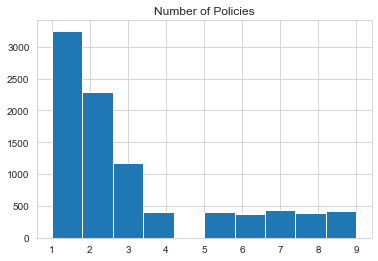

In [8]:
for column in discrete_df:
    discrete_df[column].hist()
    plt.title(column)
    plt.show()

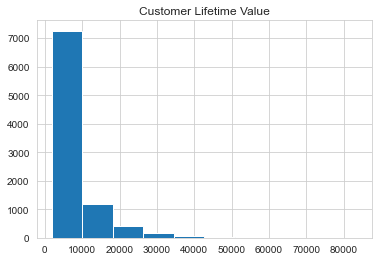

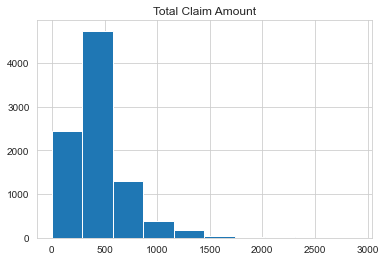

In [9]:
for column in continuous_df:
    continuous_df[column].hist()
    plt.title(column)
    plt.show()

### Look for outliers in the continuous variables we have found. Hint: There was a good plot to do that.

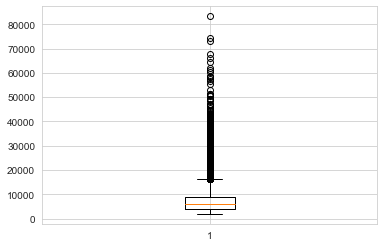

<Figure size 7200x50400 with 0 Axes>

In [10]:
plt.boxplot(continuous_df['Customer Lifetime Value'])
fig = plt.figure(figsize =(100, 700))
plt.show()

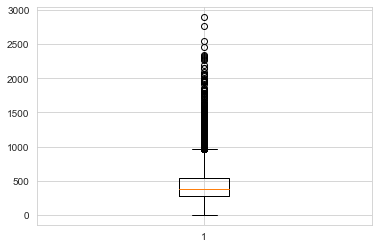

<Figure size 720x504 with 0 Axes>

In [11]:
plt.boxplot(continuous_df['Total Claim Amount'])
fig = plt.figure(figsize =(10, 7))
plt.show()

### Check nan values per column.

In [13]:
customer_df.isna().sum()

Customer                         0
State                            0
Customer Lifetime Value          0
Response                         0
Coverage                         0
Education                        0
Effective To Date                0
EmploymentStatus                 0
Gender                           0
Income                           0
Location Code                    0
Marital Status                   0
Monthly Premium Auto             0
Months Since Last Claim          0
Months Since Policy Inception    0
Number of Open Complaints        0
Number of Policies               0
Policy Type                      0
Policy                           0
Renew Offer Type                 0
Sales Channel                    0
Total Claim Amount               0
Vehicle Class                    0
Vehicle Size                     0
dtype: int64

#### there are no nan values

### Get categorical features.

In [14]:
cat = customer_df.select_dtypes(include = np.object)

In [15]:
cat.head()

,Customer,State,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Location Code,Marital Status,Policy Type,Policy,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size
0,BU79786,Washington,No,Basic,Bachelor,2/24/11,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,1/31/11,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,2/19/11,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,1/20/11,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,2/3/11,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


### What should we do with the customer_id column?

#### We can drop it becasue it cant be treated as numerical or categorical. It can not be encoded as a categorical variable becasue it has too many unique values.

In [16]:
customer_df = customer_df.drop(['Customer'], axis =1)
customer_df.head()

,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


## Lab | Data cleaning and wrangling

In [ ]:
categoricals = customer_df.select_dtypes(np.object)

In [ ]:
customer_copy = customer_df.copy()

def identify_data(x):
    # identify empty dataframe
    continuous_df = pd.DataFrame()
    discrete_df = pd.DataFrame()
    categoricals = pd.DataFrame()
    cols=x.columns
    for i in cols: 
        if x[i].dtypes in ['int64','float64']:
            if len(x[i].value_counts()) > 202:
                #print(i)
                continuous_df[i] = x[i]
            else:
                #print(i)
                discrete_df[i] = x[i]
        elif customer_df[i].dtypes == 'object':
            #print(i)
            categoricals[i] = x[i]
    return continuous_df, discrete_df, categoricals

continuous_df, discrete_df, categoricals=identify_data(customer_copy)

In [ ]:
def log_transfom_clean_(x):
    if np.isfinite(x) and x!=0: # If the value is finite and != 0...
        return np.log(x)
    else:
        return np.NAN # We are returning NaNs so that we can replace them later

def sqrt_transfom_clean_(x):
    if np.isfinite(x) and x>=0:
        return np.sqrt(x)
    else:
        return np.NAN

continuous_df['customer_lifetime_value']=continuous_df['customer_lifetime_value'].apply(log_transfom_clean_)
continuous_df['total_claim_amount']=continuous_df['total_claim_amount'].apply(log_transfom_clean_)

In [ ]:
customer_copy = customer_copy.drop(columns = ['response','policy'], axis= 1) # droppping due to data imbalance

In [ ]:
categoricals=pd.get_dummies(categoricals, columns = ['state','gender', 'location_code', 'response','marital_status', 'policy_type','policy', 'renew_offer_type','vehicle_class','sales_channel'], drop_first=True)
categoricals.head()

In [ ]:
full = pd.concat([continuous_df, discrete_df, categoricals], axis = 1 )